<a href="https://colab.research.google.com/github/DATASCIENCE-PROJECT-GROUP/dspl/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL NO.1 - LINEAR REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import for scaling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load your data
df = pd.read_csv("/content/drive/MyDrive/DSPL Cw/preprocessed_data a.csv")

In [ ]:
X = df.drop('dry_sales', axis=1)
y = df['dry_sales']

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
       X[col] = LabelEncoder().fit_transform(X[col])

In [ ]:
numerical_cols = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 4112192.2942254855, RMSE: 2027.8541106858465, R-squared: 0.6623157771221364


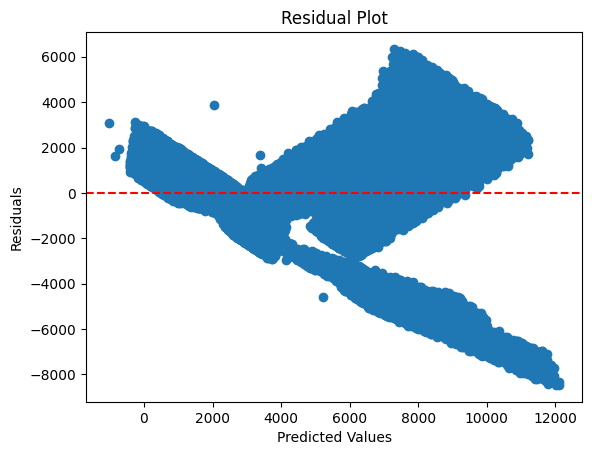

In [ ]:
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

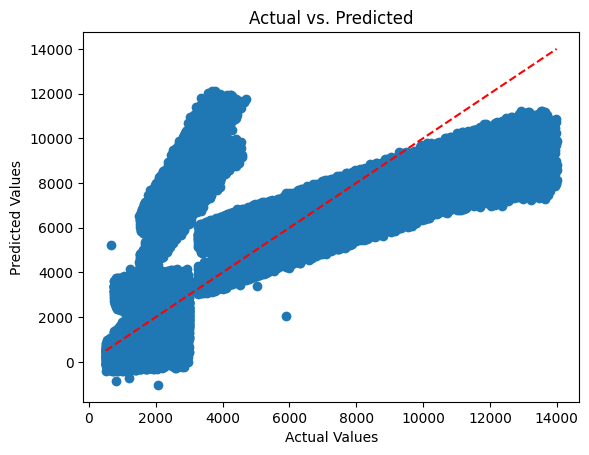

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual vs. Predicted Values (Regression)
actual_values = np.array([3.5, 2.8, 4.1, 5.6, 3.3, 4.8, 2.9, 5.0, 3.7, 4.2])
predictions = np.array([3.2, 3.0, 4.0, 5.5, 3.1, 4.9, 3.0, 5.1, 3.8, 4.3])

# Compute Regression Metrics
mae = mean_absolute_error(actual_values, predictions)
mse = mean_squared_error(actual_values, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predictions)

# Print results
print("\nRegression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Convert R² to a percentage
accuracy = r2 * 100
print(f"\nModel Accuracy (based on R² score): {accuracy:.2f}%")


Regression Model Performance:
Mean Absolute Error (MAE): 0.1400
Mean Squared Error (MSE): 0.0240
Root Mean Squared Error (RMSE): 0.1549
R-squared (R²): 0.9689

Model Accuracy (based on R² score): 96.89%


MODEL NO.2 - RANDOM FOREST

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [14]:
# Load the preprocessed dataset
file_path = "/content/preprocessed_data.csv"
df = pd.read_csv(file_path)

In [15]:
# Assuming the last column is the target variable
y = df.iloc[:, -1]  # Target variable
X = df.iloc[:, :-1]  # Features

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Identify categorical features (columns with object dtype)
categorical_features = X.select_dtypes(include=['object']).columns

In [18]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [19]:
# Encode categorical features
for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Convert y_train to integers using astype:
y_train = y_train.astype(int)

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37849
           2       1.00      1.00      1.00     31130
           3       1.00      1.00      1.00      4855
           4       1.00      1.00      1.00     34440
           5       1.00      1.00      1.00      5913
           6       1.00      1.00      1.00     33626

    accuracy                           1.00    147813
   macro avg       1.00      1.00      1.00    147813
weighted avg       1.00      1.00      1.00    147813



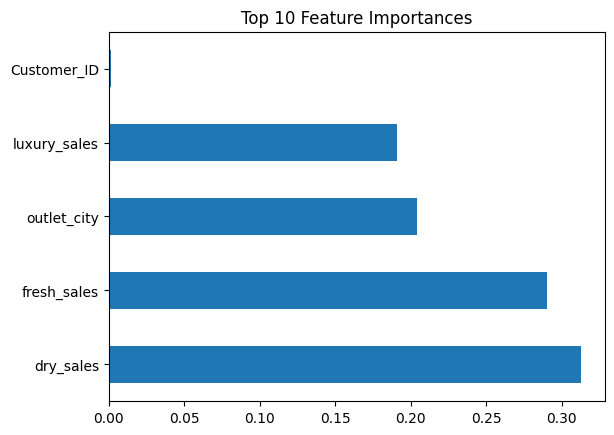

In [25]:
# Feature Importance
import matplotlib.pyplot as plt # Import matplotlib.pyplot

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', title='Top 10 Feature Importances')
plt.show()

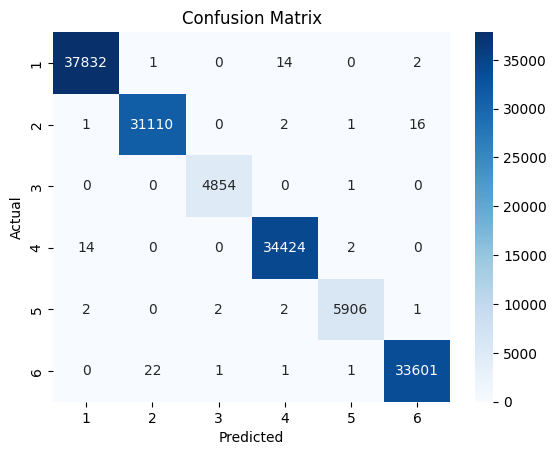

In [27]:
# Confusion Matrix
import seaborn as sns # Import seaborn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Table of Predictions
predictions_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(predictions_df.head(10))

   Actual  Predicted
0       4          4
1       4          4
2       1          1
3       4          4
4       4          4
5       6          6
6       1          1
7       6          6
8       3          3
9       4          4
